# Setup
### Imports, wipe working directories, reload .py scripts

In [ ]:
%reset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data
import pandas as pd

In [2]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [ ]:
importlib.reload(import_data)

## MAPbI Data Import

***

### Data structure:

uv_data
 - Run ID (etb0XX)
     - Sample ID ('1min')
          - wavelength
          - counts

***

### Run -> Sample Correspondence
|ETB-043|ETB-044|
|---|---|
|20min|1min|
|40min|2min|
|60min|5min|
|80min|10min|
|100min|15min|
|120min|20min|

In [3]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "etb046": "190722 ETB-046 MAPbI on glass FF/",
    "etb047": "190903 ETB-047 MAPbI on glass FF/",
    "etb048": "190904 ETB-048 MAPbI on glass FF/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])
    
cypher_etb046 = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "5min",
    "20min",
)

cypher_etb047 = (
    "10min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

cypher_etb048 = (
    "4min",
    "15min",
)

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


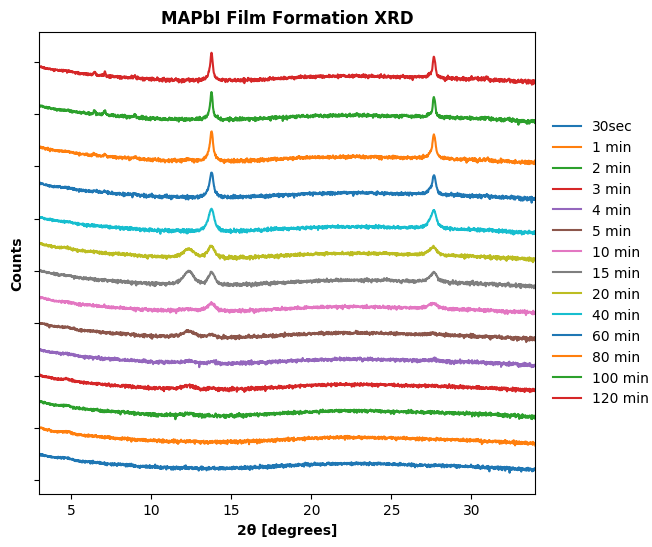

In [46]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
                
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=sample_ID.replace("min", " min"))
            
            offset += samplemax
            
plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(XRD_data["etb046"]["1min"]["2theta"]), max(XRD_data["etb046"]["1min"]["2theta"]))

plt.title("MAPbI Film Formation XRD",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [47]:
fig.savefig("plots/190912/all_stacked_log.png", dpi=200, format='png', bbox_inches='tight')

In [31]:
import math

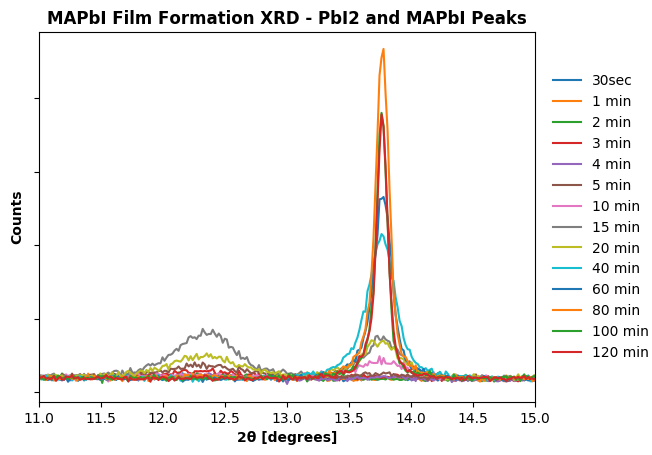

In [38]:
fig2 = plt.figure(2)
fig2_ax = plt.gca()

offset = 0

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(XRD_data[run_ID][sample_ID]["counts"])
                
            plt.figure(2)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], XRD_data[run_ID][sample_ID]["counts"] + offset,
                     label=sample_ID.replace("min", " min"))
            
#             offset += max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
#           offset += samplemax
            

plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
plt.xlim(11, 15)

fig2_ax.set_yticklabels([])

plt.title("MAPbI Film Formation XRD - PbI2 and MAPbI Peaks",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [39]:
fig2.savefig("plots/190912/all_zoom_11_15.png", dpi=200, format='png', bbox_inches='tight')

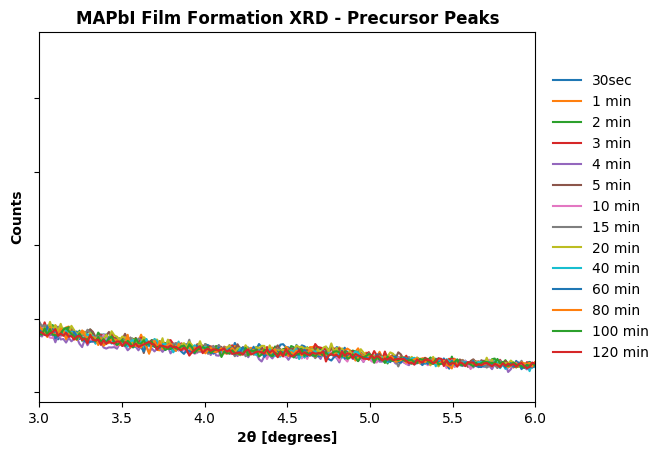

In [43]:
fig3 = plt.figure(3)
fig3_ax = plt.gca()

offset = 0


for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(XRD_data[run_ID][sample_ID]["counts"])
                
            plt.figure(3)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], XRD_data[run_ID][sample_ID]["counts"] + offset,
                     label=sample_ID.replace("min", " min"))
            
#           offset += max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
#           offset += samplemax
            

plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
plt.xlim(3, 6)

fig3_ax.set_yticklabels([])

plt.title("MAPbI Film Formation XRD - Precursor Peaks",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [44]:
fig3.savefig("plots/190912/all_zoom_3_6.png", dpi=200, format='png', bbox_inches='tight')